In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [37]:
data = yf.download('GOOGL', start='2022-01-01', end='2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [39]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2022-01-03,143.998322,144.851931,142.728576,144.061378,28646000
2022-01-04,143.410385,145.481595,142.732065,144.400050,28400000
2022-01-05,136.831268,143.509710,136.744874,143.430756,54618000
2022-01-06,136.803955,138.981442,135.623104,136.060093,37348000
2022-01-07,136.078445,137.500143,134.836508,137.199210,29760000


In [40]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,5349.000000,5349.000000,5349.000000,5349.000000,5.349000e+03
mean,53.824758,54.385641,53.233211,53.801511,1.123029e+08
std,54.528135,55.123595,53.886082,54.478177,1.447646e+08
min,2.485610,2.528606,2.384952,2.465230,9.312000e+06
25%,13.272571,13.398579,13.130160,13.286988,3.029200e+07
50%,29.187689,29.371421,28.964727,29.189181,5.296298e+07
75%,74.405319,75.004682,73.508996,74.129728,1.327631e+08
max,292.809998,303.809998,287.320007,291.679993,1.643023e+09


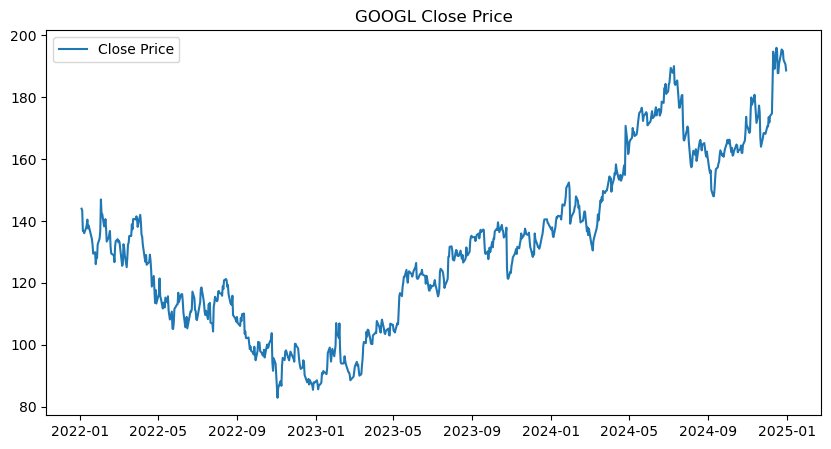

In [41]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close Price')
plt.title('GOOGL Close Price')
plt.legend()
plt.show()

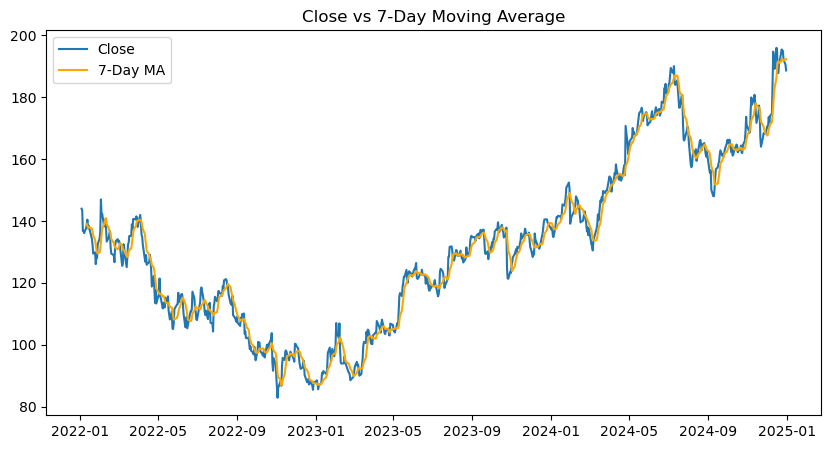

In [42]:
data['MA7'] = data['Close'].rolling(7).mean()

plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA7'], label='7-Day MA', color='orange')
plt.title('Close vs 7-Day Moving Average')
plt.legend()
plt.show()


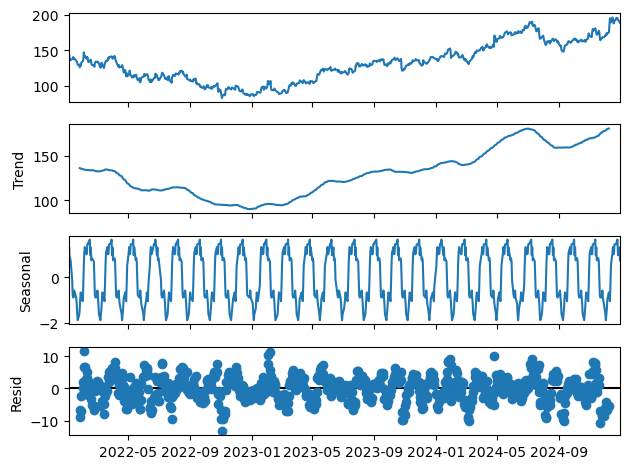

In [43]:
decompose = seasonal_decompose(data['Close'], period=30)
decompose.plot()
plt.show()


In [44]:
result = adfuller(data['Volume'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("Volume is stationary")
else:
    print("Volume is NOT stationary")


ADF Statistic: -8.771845334706997
p-value: 2.5087092871115687e-14
Volume is stationary


In [49]:
model = ARIMA(data['Close'], order=(1,0,0))
model_fit = model.fit()

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
forecast = model_fit.forecast(30)
forecast_index = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_series = pd.Series(forecast, index=forecast_index)

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


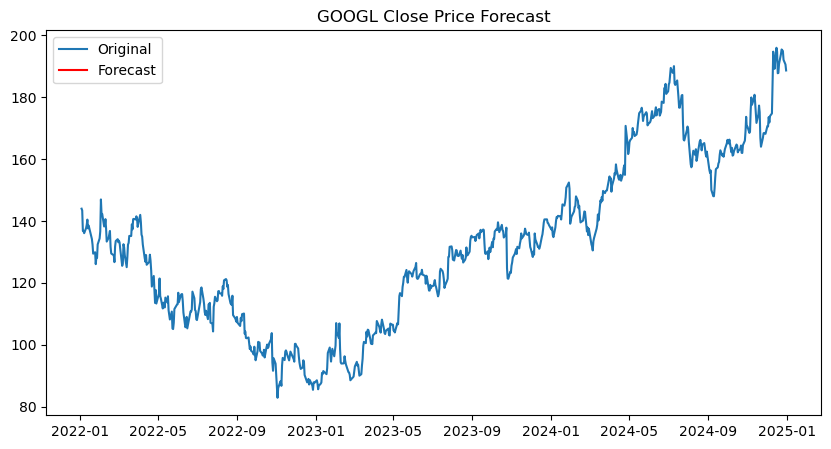

In [48]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Original')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('GOOGL Close Price Forecast')
plt.legend()
plt.show()

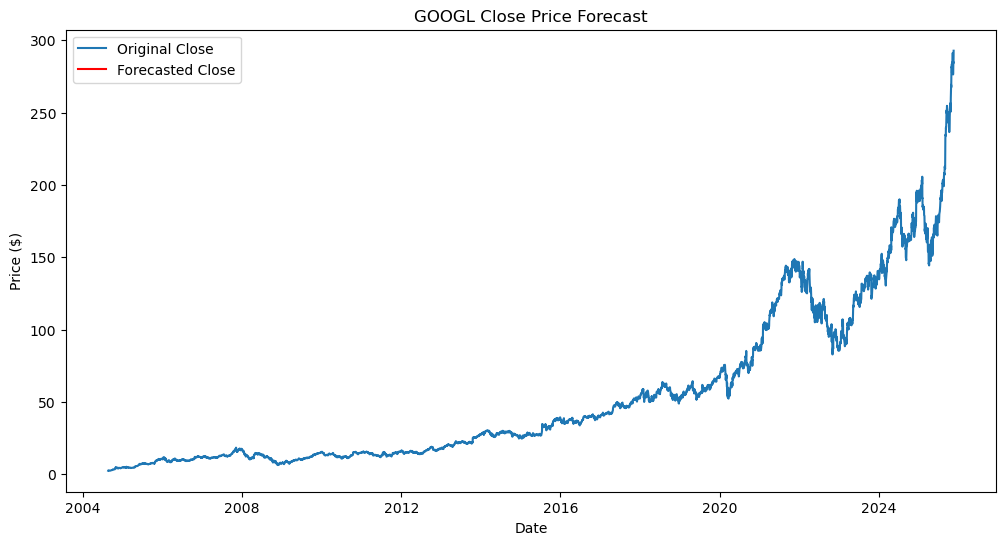

In [35]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Original Close')
plt.plot(forecast_series, label='Forecasted Close', color='red')
plt.title('GOOGL Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()